In [223]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib

In [224]:
img = cv2.imread('./test image/test1.jpg')
img.shape
#Blue Green Red (BGR)

(555, 700, 3)

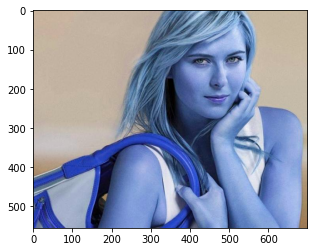

In [225]:
plt.imshow(img)

That is a colourful RGB image


Converting it to a grey image

In [226]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey.shape

(555, 700)

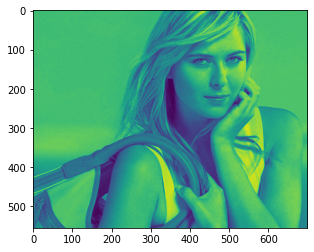

In [227]:
plt.imshow(grey)

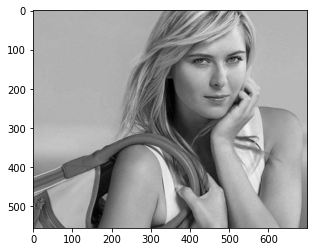

In [228]:
plt.imshow(grey, cmap='gray')

Loading haarcascade to detect face and eyes

In [229]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


# Detecting the face
faces = face_cascade.detectMultiScale(grey,1.3, 5)
faces
#  returns a 2d array each array represents a face with 4 dimentions in it
# like the below one represents 
#  x  y  width  heigth  

array([[352,  38, 233, 233]], dtype=int32)

In [230]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

drawing a rectangle on the image to know what dimension we got

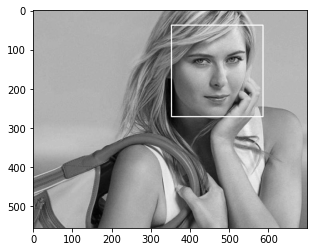

In [231]:
face_img = cv2.rectangle(grey,(x,y),(x+w,y+h), (255, 0, 0),2)
plt.imshow(face_img, cmap='gray')

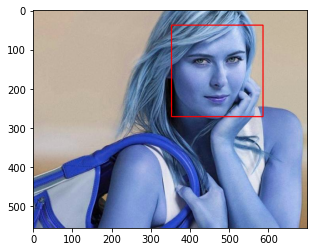

In [232]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h), (255, 0, 0),2)
plt.imshow(face_img)

detecting the eyes inside the face ractangle region of each and every face found on the image

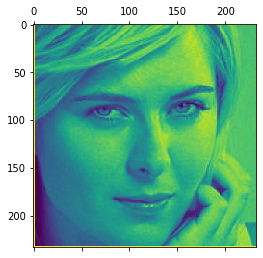

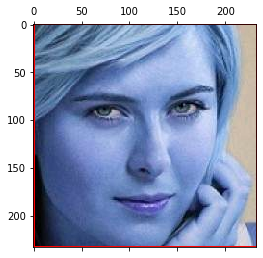

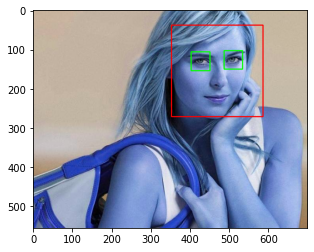

In [233]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h), (255, 0, 0),2)
    roi_gray = grey[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    plt.matshow(roi_gray)
    plt.matshow(roi_color)
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh), (0, 255, 0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


# roi - region of intrest

In [234]:
def cropped_image_2_eyes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

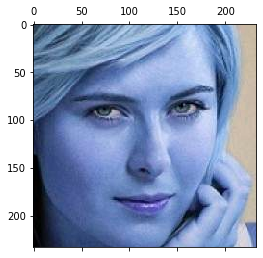

In [235]:
cropped_img = cropped_image_2_eyes('./test image/test1.jpg')
plt.matshow(cropped_img)

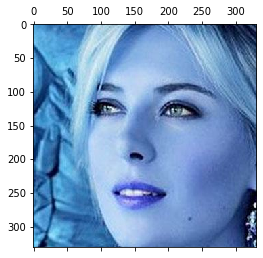

In [236]:
cropped_img = cropped_image_2_eyes('./test image/test2.jpg')
plt.matshow(cropped_img)

##### Making a cropped folder with the images of only faces of the sports person automatically 

and at last manually cleaning bad images found

In [237]:
path_to_data = './dataset/'
path_to_crop = './dataset/cropped/'

In [238]:
import os
import shutil
if os.path.exists(path_to_crop):
    shutil.rmtree(path_to_crop) 
dirs = []
for entry in os.scandir(path_to_data):
    print(entry)
    if entry.is_dir():
        dirs.append(entry.path)

print(dirs)

<DirEntry '.DS_Store'>
<DirEntry 'maria_sharapova'>
<DirEntry 'virat_kohli'>
<DirEntry 'lionel_messi'>
<DirEntry 'serena_williams'>
<DirEntry 'roger_federer'>
['./dataset/maria_sharapova', './dataset/virat_kohli', './dataset/lionel_messi', './dataset/serena_williams', './dataset/roger_federer']


In [239]:
if os.path.exists(path_to_crop):
    shutil.rmtree(path_to_crop)         # Remove the directory if it exists so tht in case i run the code again n again this directory doesnt create itself again
os.mkdir(path_to_crop)
print(path_to_crop)

./dataset/cropped/


In [240]:
crop_img_dir = []
file_name_dict = {}
for img_dir in dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    file_name_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = cropped_image_2_eyes(entry.path)

        if roi_color is not None:
            path = path_to_crop + celebrity_name

            if not os.path.exists(path):
                os.mkdir(path)
                crop_img_dir.append(path)
            
            crop_file_name = celebrity_name + str(count) + '.png'
            crop_file_path = path + '/' + crop_file_name
            cv2.imwrite(crop_file_path, roi_color)

            #  Updating the dictionary
            file_name_dict[celebrity_name].append(crop_file_path)

            count += 1

maria_sharapova
virat_kohli
lionel_messi
serena_williams
roger_federer


##### Feature Detection

Wavelet Form

In [241]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

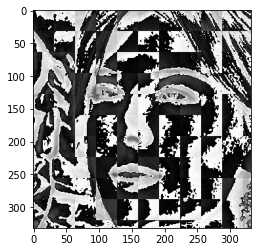

In [242]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [243]:
celebrity_file_names_dict = {}
for img_dir in crop_img_dir:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova2.png',
  './dataset/cropped/maria_sharapova/maria_sharapova3.png',
  './dataset/cropped/maria_sharapova/maria_sharapova1.png',
  './dataset/cropped/maria_sharapova/maria_sharapova4.png',
  './dataset/cropped/maria_sharapova/maria_sharapova5.png',
  './dataset/cropped/maria_sharapova/maria_sharapova7.png',
  './dataset/cropped/maria_sharapova/maria_sharapova6.png',
  './dataset/cropped/maria_sharapova/maria_sharapova17.png',
  './dataset/cropped/maria_sharapova/maria_sharapova16.png',
  './dataset/cropped/maria_sharapova/maria_sharapova28.png',
  './dataset/cropped/maria_sharapova/maria_sharapova14.png',
  './dataset/cropped/maria_sharapova/maria_sharapova15.png',
  './dataset/cropped/maria_sharapova/maria_sharapova29.png',
  './dataset/cropped/maria_sharapova/maria_sharapova11.png',
  './dataset/cropped/maria_sharapova/maria_sharapova10.png',
  './dataset/cropped/maria_sharapova/maria_sharapova12.png',
  './dataset

In [244]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [245]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [246]:
len(x[0])

4096

In [247]:
x[0]

array([[ 43],
       [ 43],
       [ 43],
       ...,
       [253],
       [242],
       [ 19]], dtype=uint8)

In [248]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

# converting 
# [[1],
# [2],
# [3]]

# to [1,2,3,4,5]

(187, 4096)

#### Model Training

In [249]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8085106382978723

In [252]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.71      1.00      0.83        10
           2       0.91      0.91      0.91        11
           3       0.80      0.80      0.80        10
           4       0.86      0.86      0.86         7

    accuracy                           0.81        47
   macro avg       0.82      0.80      0.79        47
weighted avg       0.82      0.81      0.80        47



#### Grid Search CV

In [253]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [254]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [256]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.728571,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.635714,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.785714,{'logisticregression__C': 1}


In [257]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [259]:
best_estimators['svm'].score(x_test,y_test)

0.8085106382978723

In [261]:
best_estimators['random_forest'].score(x_test,y_test)

0.574468085106383

In [262]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8085106382978723

In [263]:
best_clf = best_estimators['logistic_regression']

In [264]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 8,  0,  1,  0,  0],
       [ 1,  7,  2,  0,  0],
       [ 1,  0, 10,  0,  0],
       [ 2,  0,  0,  8,  0],
       [ 1,  0,  0,  1,  5]])

Text(69.0, 0.5, 'Truth')

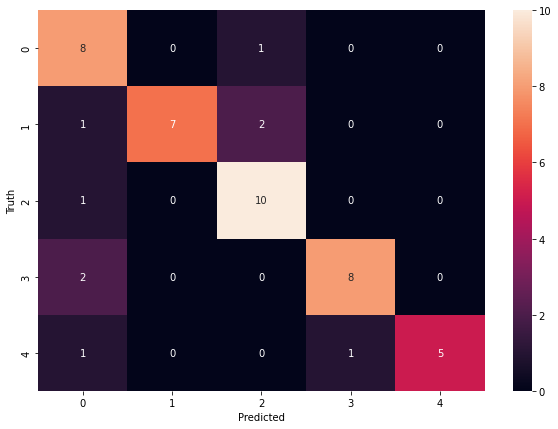

In [265]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [266]:
import joblib 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [267]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))